In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
'''
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
'''

"\nclass_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',\n               'dog', 'frog', 'horse', 'ship', 'truck']\n\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i], cmap=plt.cm.binary)\n    # The CIFAR labels happen to be arrays, \n    # which is why you need the extra index\n    plt.xlabel(class_names[train_labels[i][0]])\nplt.show()\n"

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1'),
    layers.MaxPooling2D((2, 2), name='maxPooling1'),
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2), name='maxPooling2'),
    layers.Conv2D(64, (3, 3), activation='relu', name='conv3'),
    layers.Flatten(name='flatten1'),
    layers.Dense(64, activation='relu', name='activate'),
    layers.Dense(10, name='output')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
maxPooling1 (MaxPooling2D)   (None, 15, 15, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
maxPooling2 (MaxPooling2D)   (None, 6, 6, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten1 (Flatten)           (None, 1024)              0         
_________________________________________________________________
activate (Dense)             (None, 64)                6

In [6]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5324 - accuracy: 0.4391 - val_loss: 1.2868 - val_accuracy: 0.5395
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1716 - accuracy: 0.5851 - val_loss: 1.0633 - val_accuracy: 0.6238
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0131 - accuracy: 0.6440 - val_loss: 0.9635 - val_accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9152 - accuracy: 0.6794 - val_loss: 0.9459 - val_accuracy: 0.6739
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8496 - accuracy: 0.7015 - val_loss: 0.9104 - val_accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7897 - accuracy: 0.7242 - val_loss: 0.8823 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7412 - accuracy: 0.7396 - val_loss: 0.8566 -

313/313 - 1s - loss: 0.8782 - accuracy: 0.7073


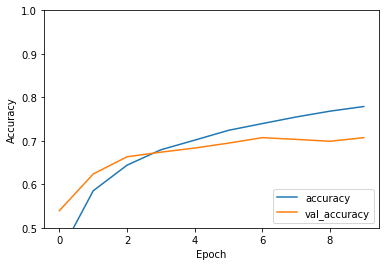

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
model.save('save/cnn.h5')